# Imports

In [74]:
import numpy as np
import random
import pylab
from scipy import stats
import pylab as pl
import mpl_toolkits
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score


import pandas as pd
from sklearn.datasets import make_blobs
import plotly.express as px
import seaborn as sns
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
# import plotly as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

# Load Data (and understand) 

In [75]:
# коррелящия признаков с данными о прдахах и EDA
df = pd.read_csv('/Users/user/Desktop/netology/ml/data_for_diploma.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
profile = ProfileReport(df)
profile

/Users/user/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,12
Number of observations,8523
Total Missing (%),3.8%
Total size in memory,799.2 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [77]:
df[df['Item_Outlet_Sales'] < 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


(0.0, 15622.314270104314)

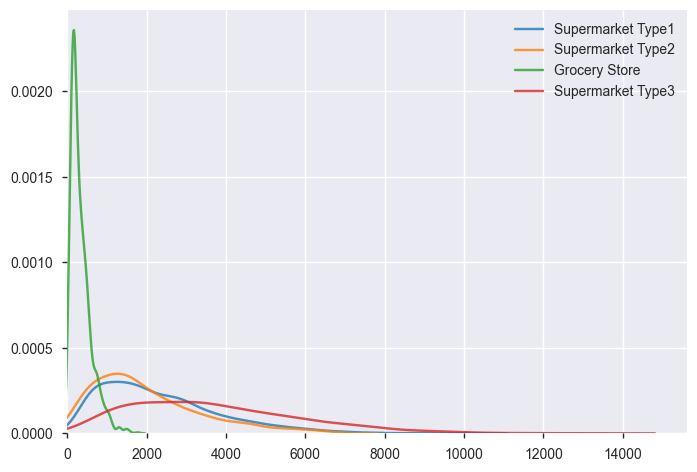

In [78]:
# Outlet_Type
for t in df['Outlet_Type'].unique():
    subset = df[df['Outlet_Type'] == t]
    
    sns.kdeplot(subset['Item_Outlet_Sales'].dropna(),
               label = t, shade = False, alpha = 0.8);
    
plt.xlim(0, None)

(0.0, 15622.314270104314)

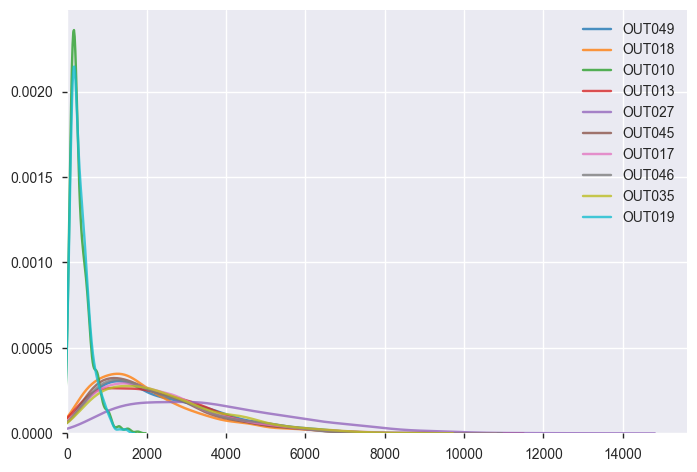

In [79]:
# Outlet_Identifier
for t in df['Outlet_Identifier'].unique():
    subset = df[df['Outlet_Identifier'] == t]
    
    sns.kdeplot(subset['Item_Outlet_Sales'].dropna(),
               label = t, shade = False, alpha = 0.8);
    
plt.xlim(0, None)

(0.0, 15056.047803740817)

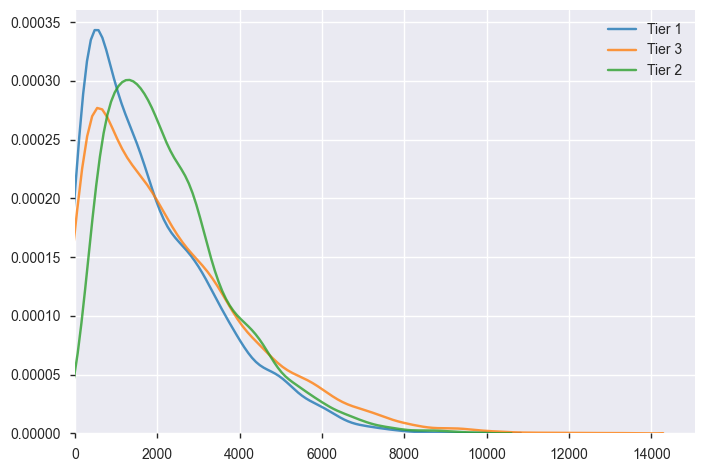

In [80]:
# Outlet_Location_Type
for t in df['Outlet_Location_Type'].unique():
    subset = df[df['Outlet_Location_Type'] == t]
    
    sns.kdeplot(subset['Item_Outlet_Sales'].dropna(),
               label = t, shade = False, alpha = 0.8);
    
plt.xlim(0, None)

(0.0, 14831.89699106993)

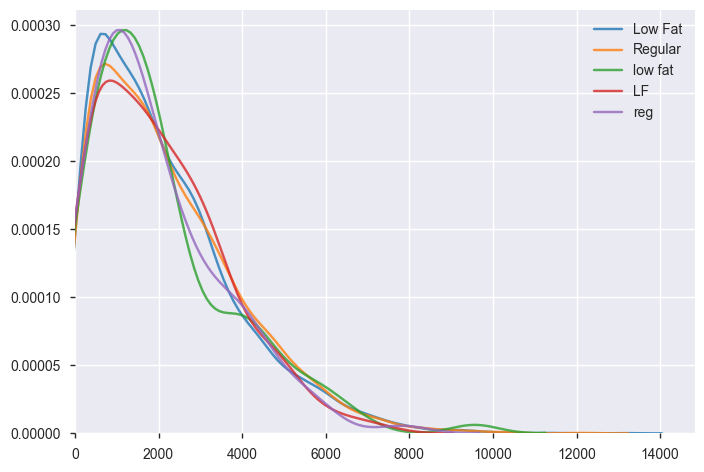

In [81]:
# Item_Fat_Content

for t in df['Item_Fat_Content'].unique():
    subset = df[df['Item_Fat_Content'] == t]
    
    sns.kdeplot(subset['Item_Outlet_Sales'].dropna(),
               label = t, shade = False, alpha = 0.8);
    
plt.xlim(0, None)

(0.0, 15306.23288578302)

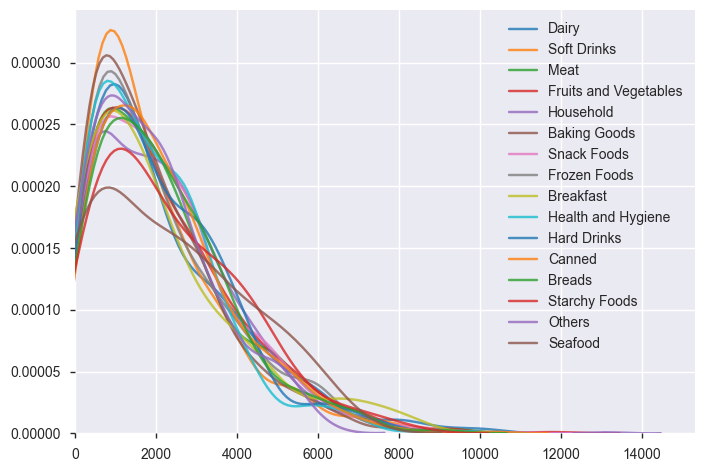

In [82]:
# Item_Type

for t in df['Item_Type'].unique():
    subset = df[df['Item_Type'] == t]
    
    sns.kdeplot(subset['Item_Outlet_Sales'].dropna(),
               label = t, shade = False, alpha = 0.8);
    
plt.xlim(0, None)

(0.0, 15024.178697453066)

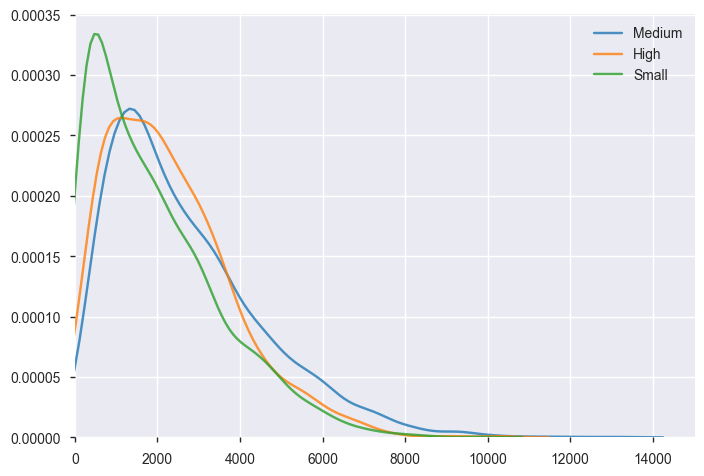

In [83]:
# Outlet_Size

for t in df['Outlet_Size'].unique():
    subset = df[df['Outlet_Size'] == t]
    
    sns.kdeplot(subset['Item_Outlet_Sales'].dropna(),
               label = t, shade = False, alpha = 0.8);
    
plt.xlim(0, None)

# Feature transform.

In [84]:
# Обработка категорияальных признаков и устранение пропущенных значений
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [85]:
# Item_Fat_Content

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le.fit(df['Item_Identifier'])
df['Item_Identifier']  = le.transform(df['Item_Identifier'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [86]:
# Item_Fat_Content
df['is_reg'] = ((df['Item_Fat_Content'] == 'reg') | (df['Item_Fat_Content'] == 'Regular')).astype(int)
df.drop(columns = ['Item_Fat_Content'], inplace= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,is_reg
0,156,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,8,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,662,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,1121,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1
4,1297,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0


In [87]:
# Outlet_Size

df['is_small'] = (df['Outlet_Size'] == 'Small').astype(int)
df.drop(columns = ['Outlet_Size'], inplace= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,is_reg,is_small
0,156,9.30,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,0,0
1,8,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,1,0
2,662,17.50,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,0,0
3,1121,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,1,0
4,1297,8.93,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,0,0


In [88]:
# Outlet_Type

df['is_gr_store'] = (df['Outlet_Type'] == 'Grocery Store').astype(int)
df['is_supm_type3'] = (df['Outlet_Type'] == 'Supermarket Type3').astype(int)
df.drop(columns = ['Outlet_Type'], inplace= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,is_reg,is_small,is_gr_store,is_supm_type3
0,156,9.30,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,3735.1380,0,0,0,0
1,8,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,443.4228,1,0,0,0
2,662,17.50,0.016760,Meat,141.6180,OUT049,1999,Tier 1,2097.2700,0,0,0,0
3,1121,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,732.3800,1,0,1,0
4,1297,8.93,0.000000,Household,53.8614,OUT013,1987,Tier 3,994.7052,0,0,0,0


In [89]:
# Outlet_Identifier
ohe = OneHotEncoder()

ohe.fit(df[['Outlet_Identifier']])
ohe.transform(df[['Outlet_Identifier']]).toarray()

tmp_df = pd.DataFrame(ohe.transform(df[['Outlet_Identifier']]).toarray())
tmp_df.columns = ohe.get_feature_names(['is_shop'])

df = pd.concat([df, tmp_df],axis=1)
df.drop(columns = ['Outlet_Identifier'], inplace= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,is_reg,is_small,...,is_shop_OUT010,is_shop_OUT013,is_shop_OUT017,is_shop_OUT018,is_shop_OUT019,is_shop_OUT027,is_shop_OUT035,is_shop_OUT045,is_shop_OUT046,is_shop_OUT049
0,156,9.30,0.016047,Dairy,249.8092,1999,Tier 1,3735.1380,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8,5.92,0.019278,Soft Drinks,48.2692,2009,Tier 3,443.4228,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,662,17.50,0.016760,Meat,141.6180,1999,Tier 1,2097.2700,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1121,19.20,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,732.3800,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1297,8.93,0.000000,Household,53.8614,1987,Tier 3,994.7052,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Outlet_Location_Type
ohe = OneHotEncoder()

ohe.fit(df[['Outlet_Location_Type']])
ohe.transform(df[['Outlet_Location_Type']]).toarray()

tmp_df = pd.DataFrame(ohe.transform(df[['Outlet_Location_Type']]).toarray())
tmp_df.columns = ohe.get_feature_names(['loc_type'])

df = pd.concat([df, tmp_df],axis=1)
df.drop(columns = ['Outlet_Location_Type'], inplace= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,is_reg,is_small,is_gr_store,...,is_shop_OUT018,is_shop_OUT019,is_shop_OUT027,is_shop_OUT035,is_shop_OUT045,is_shop_OUT046,is_shop_OUT049,loc_type_Tier 1,loc_type_Tier 2,loc_type_Tier 3
0,156,9.30,0.016047,Dairy,249.8092,1999,3735.1380,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,662,17.50,0.016760,Meat,141.6180,1999,2097.2700,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1121,19.20,0.000000,Fruits and Vegetables,182.0950,1998,732.3800,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1297,8.93,0.000000,Household,53.8614,1987,994.7052,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
# Item_Type

df['is_seafood'] = (df['Item_Type'] == 'Seafood').astype(int)
df['is_soft_drinks'] = (df['Item_Type'] == 'Soft Drinks').astype(int)
df['is_backing'] = (df['Item_Type'] == 'Baking Goods').astype(int)
df['is_st_food'] = (df['Item_Type'] == 'Starchy Foods').astype(int)
df.drop(columns = ['Item_Type'], inplace= True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,is_reg,is_small,is_gr_store,is_supm_type3,...,is_shop_OUT045,is_shop_OUT046,is_shop_OUT049,loc_type_Tier 1,loc_type_Tier 2,loc_type_Tier 3,is_seafood,is_soft_drinks,is_backing,is_st_food
0,156,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0
1,8,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0
2,662,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0
3,1121,19.20,0.000000,182.0950,1998,732.3800,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
4,1297,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0


In [92]:
# fill null

df = df.fillna(df.mean())

In [93]:
# Еще раз смотрим корреляцию
profile = ProfileReport(df)
profile

/Users/user/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,27
Number of observations,8523
Total Missing (%),0.0%
Total size in memory,1.8 MiB
Average record size in memory,216.0 B
Numeric,6
Categorical,0
Boolean,20
Date,0
Text (Unique),0
Rejected,1


# Modeling

In [94]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Item_Outlet_Sales']),  
                                                    df[['Item_Outlet_Sales']], 
                                                    test_size=0.2)

In [95]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
from sklearn.metrics import r2_score
# Тк задача регрессии то метрику возьмем r2

lr = LinearRegression()
lr.fit(X_train, y_train)

print(r2_score(y_test, lr.predict(X_test)))

0.5552692915184729


In [97]:
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

print(r2_score(y_test, lr.predict(X_test)))

0.5552692915184729


In [98]:
# from sklearn.utils.testing import ignore_warnings
# from sklearn.exceptions import ConvergenceWarning

In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# пострение и подбор парамтрв для линейнй модели, оценка качесттва на отложенной выборке

l = Lasso()
l_params = {'alpha': 10.**np.arange(0,6)}

grid_l = GridSearchCV(l, l_params, scoring='r2', cv = 10)
grid_l.fit(X_train, y_train)

print(grid_l.best_params_)
print(grid_l.best_score_)

{'alpha': 10.0}
0.5638761022155421


In [100]:
l = Lasso(alpha=10)
l.fit(X_train, y_train)
print(r2_score(y_test, l.predict(X_test)))

0.5557168758828757


In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg.fit(X_train, y_train)

print(r2_score(y_test, polyreg.predict(X_test)))

0.5938164880368504


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# пострение и подбор парамтрв для нелинейнй модели, оценка качесттва на отложенной выборке

rf = RandomForestRegressor()
rf_params = {
    'max_depth': [2, 5, 10],
    'n_estimators': [10, 50, 100, 300, 1000]
}

grid_rf = GridSearchCV(rf, rf_params, scoring='r2', cv = 3)
grid_rf.fit(X_train, list(y_train['Item_Outlet_Sales']))

print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 5, 'n_estimators': 1000}
0.5941194074149746


In [103]:
rf = RandomForestRegressor(max_depth=5, n_estimators=100)
rf.fit(X_train, y_train)
print(r2_score(y_test, rf.predict(X_test)))

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.5906006895960962


In [104]:
# Топ признаков влияющие на объем продаж
# Три наиболее весомые фичи - 'Item_MRP', 'is_small', 'is_shop_OUT019'

print(rf.feature_importances_)

[1.40610077e-03 2.93612742e-04 3.46678960e-03 5.52543094e-01
 2.82668055e-02 4.51325881e-05 1.46321627e-06 3.14807327e-01
 5.15018874e-02 1.91837684e-06 0.00000000e+00 6.13209566e-05
 5.50544354e-04 1.28318776e-06 4.68413958e-02 3.65246950e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.28326078e-06
 1.84852648e-05 2.77726796e-06 3.90459661e-06 5.47142834e-05
 2.67351975e-05 6.59008747e-05]
